## 단일 선형회귀분석

### 최소제곱(자승)법 직접하기

In [19]:
import pandas as pd
from pandas import DataFrame

In [20]:
x = [13,19,16,14,15,14]
y = [40,83,62,48,58,43]
data = pd.DataFrame(data=[x,y]).T
data.columns=['x','y']
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


In [21]:
data['x^2'] = data['x']**2
data['x_i*y_i'] = data['x']*data['y']
data

,x,y,x^2,x_i*y_i
0,13,40,169,520
1,19,83,361,1577
2,16,62,256,992
3,14,48,196,672
4,15,58,225,870
5,14,43,196,602


In [22]:
sum_xy = data['x_i*y_i'].sum()
sum_x2 = data['x^2'].sum()

In [23]:
mean_x = data['x'].mean()
mean_y = data['y'].mean()

In [24]:
n = data.shape[0]
n

6

In [25]:
a = (sum_xy - n * mean_x * mean_y) / (sum_x2 - n * mean_x ** 2)
a

7.32846715328465

In [26]:
b = mean_y - a * mean_x
b

-55.48175182481719

In [27]:
x = data['x']
y = a * x + b

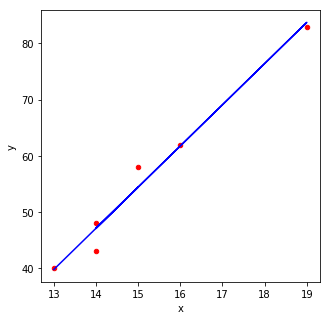

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
data.plot(kind='scatter',x='x', y='y',figsize=(5,5),color='red')
plt.plot(x,y,color='blue')

### 파이썬 이용해서 하기

In [29]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# ipython의 'magic function' 중 하나로, matplotlib의 시각화 결과를 Ipython notebook 안에서 출력하는 함수
%matplotlib inline

#matplotlib 패키지에서 제공하는 스타일중 ggplot 지정
matplotlib.style.use('ggplot')

In [30]:
# linear_model 모듈이 포함하고 있는 Linearregression() 함수를 'linear_regression'이라고 하는 변수에 할당
linear_regression = linear_model.LinearRegression()

# 선형회귀 모델 훈련 실행
linear_regression.fit(X= pd.DataFrame(data['x']), y = data['y'])

# 선형 회귀식의 세로축 절편 출력
print('b value = ', linear_regression.intercept_)

# 선형 회귀식의 기울기 출력
print('a value = ', linear_regression.coef_)

b value =  -55.48175182481753
a value =  [7.32846715]


In [31]:
# 선형회귀 모델을 적용해서 선형회귀값 구하기
prediction = linear_regression.predict(X = pd.DataFrame(data['x']))

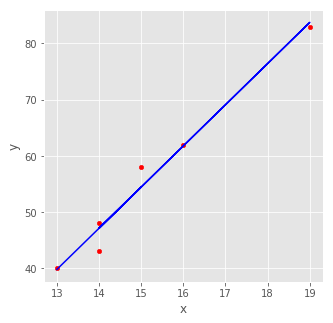

In [32]:
data.plot(kind='scatter',x='x', y='y',figsize=(5,5),color='red')
plt.plot(x,y,color='blue')

### 적합도

In [33]:
# 실제 y값과 예측한 y값의 차인 잔차(residuals) 구하기
residuals = data['y'] - prediction
print(residuals)

# 변수개수, 잔차의 평균값, 표준편차, 최소값, 25%, 50%, 75%값, 최대값
residuals.describe()

0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64


count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [34]:
# 잔차를 제곱하여 합한 SSE
SSE = (residuals**2).sum()
print('SSE = ', SSE)

# y값의 편차의 제곱한 것을 모두 합한 SST
SST = ((data['y'] - data['y'].mean())**2).sum()
print('SST = ', SST)

# 결정계수 R
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

SSE =  31.03649635036502
SST =  1257.3333333333333
R_squared =  0.9753156179610034


### 적합도 직접검증

In [35]:
data['y_pred'] = a * x + b
data

,x,y,x^2,x_i*y_i,y_pred
0,13,40,169,520,39.788321
1,19,83,361,1577,83.759124
2,16,62,256,992,61.773723
3,14,48,196,672,47.116788
4,15,58,225,870,54.445255
5,14,43,196,602,47.116788


In [36]:
data['y - y_pred'] = data['y'] - data['y_pred']
data['pow(y - y_pred)'] = data['y - y_pred'] ** 2
data

,x,y,x^2,x_i*y_i,y_pred,y - y_pred,pow(y - y_pred)
0,13,40,169,520,39.788321,0.211679,0.044808
1,19,83,361,1577,83.759124,-0.759124,0.576269
2,16,62,256,992,61.773723,0.226277,0.051201
3,14,48,196,672,47.116788,0.883212,0.780063
4,15,58,225,870,54.445255,3.554745,12.636209
5,14,43,196,602,47.116788,-4.116788,16.947946


In [37]:
mean_y = data['y'].mean()

In [38]:
data['y - y_bar'] = data['y'] - mean_y
data['pow(y - y_bar)'] = data['y - y_bar'] **2
data

,x,y,x^2,x_i*y_i,y_pred,y - y_pred,pow(y - y_pred),y - y_bar,pow(y - y_bar)
0,13,40,169,520,39.788321,0.211679,0.044808,-15.666667,245.444444
1,19,83,361,1577,83.759124,-0.759124,0.576269,27.333333,747.111111
2,16,62,256,992,61.773723,0.226277,0.051201,6.333333,40.111111
3,14,48,196,672,47.116788,0.883212,0.780063,-7.666667,58.777778
4,15,58,225,870,54.445255,3.554745,12.636209,2.333333,5.444444
5,14,43,196,602,47.116788,-4.116788,16.947946,-12.666667,160.444444


In [39]:
SST = data['pow(y - y_bar)'].sum()
SSE = data['pow(y - y_pred)'].sum()

In [40]:
SSR = SST - SSE

In [41]:
R2 = SSR/SST
R2

0.9753156179610034

### 성능검사

In [42]:
from sklearn.metrics import mean_squared_error

# 결정계수 구하기
print('score = ', linear_regression.score(X = pd.DataFrame(data['x']), y = data['y']))

# 잔차의 제곱의 합 (SSE)
print('Mean_Squared_Error = ' , mean_squared_error(prediction, data['y']))

# 제곱근
print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)

score =  0.9753156179610034
Mean_Squared_Error =  5.172749391727503
RMSE =  2.2743679103714736
